In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

**Read the data**

In [ ]:
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


**Exploring the data**

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Rename the released column to released date for better readability
df.rename(columns={'released': 'released_date'}, inplace=True)

In [ ]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released_date', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

**Ckeck missing data**

In [ ]:
pct_missing = pd.DataFrame({'Pct_missing': df.isnull().sum() * 100 / len(df)})
pct_missing.style.format({'Pct_missing': "{:.2f}%"})

,Pct_missing
name,0.00%
rating,1.00%
genre,0.00%
year,0.00%
released_date,0.03%
score,0.04%
votes,0.04%
director,0.00%
writer,0.04%
star,0.01%


In [ ]:
# Remove the missing values from released_date column
df.dropna(subset=['released_date'], inplace=True)

In [ ]:
df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released_date,0
score,3
votes,3
director,0
writer,3
star,1


In [ ]:
# Fill the missing values of the numeric columns with the mean
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['score'].fillna(df['score'].mean(), inplace=True)
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

/tmp/ipython-input-4114033590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].fillna(df['budget'].mean(), inplace=True)
/tmp/ipython-input-4114033590.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Round the score column values to one decimal number to be simpler
df['score'] = df['score'].astype(float).round(1)
df['score']

,score
0,8.4
1,5.8
2,8.7
3,7.7
4,7.3
...,...
7663,3.1
7664,4.7
7665,5.7
7666,6.4


In [ ]:
# Fill the missing values of these columns
df['company'].fillna('Unknown', inplace=True)
df['writer'].fillna('Unknown', inplace=True)
df['star'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Replace existing "Unrated" values with "Not Rated" too to avoid confusion
df['rating'].replace('Unrated', 'Not Rated', inplace=True)

/tmp/ipython-input-1896224858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1896224858.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df['rating'].value_counts()

,count
rating,
R,3695
PG-13,2112
PG,1252
Not Rated,412
G,153
NC-17,23
TV-MA,9
TV-PG,5
X,3


In [ ]:
df.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released_date,0
score,0
votes,0
director,0
writer,0
star,0


**Check the data types for our columns**

In [ ]:
data_type = pd.DataFrame({'data_type': df.dtypes})
data_type

,data_type
name,object
rating,object
genre,object
year,int64
released_date,object
score,float64
votes,float64
director,object
writer,object
star,object


In [ ]:
# Drop the country part of the released_date column to convert it into date format
df['released_date'] = df['released_date'].str.split(" (", regex=False).str[0]
df['released_date']

,released_date
0,"June 13, 1980"
1,"July 2, 1980"
2,"June 20, 1980"
3,"July 2, 1980"
4,"July 25, 1980"
...,...
7663,"October 23, 2020"
7664,"February 7, 2020"
7665,"April 27, 2020"
7666,"October 1, 2020"


In [ ]:
# Change the data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['released_date'] = pd.to_datetime(df['released_date'], format='mixed', errors='coerce')

In [ ]:
df['released_date'].isnull().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released_date,datetime64[ns]
score,float64
votes,int64
director,object
writer,object
star,object


In [ ]:
df['released_date'].isnull().sum()

np.int64(0)

**We have some year values in the year column that do not match the year in the released_date column**

We can fix that issue by creating a new column extracted from the released_date column that contains the released year

In [ ]:
df['year_corrected'] = df['released_date'].dt.year
df

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,2020-10-23,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Unknown,90,2020
7664,Dream Round,Not Rated,Comedy,2020,2020-02-07,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,Not Rated,Drama,2020,2020-04-27,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020
7666,It's Just Us,Not Rated,Drama,2020,2020-10-01,6.4,88105,James Randall,James Randall,Christina Roz,United States,15000,78500541,Unknown,120,2020


**Check the duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Data processing**(extracting impactful insights)

In [ ]:
# The film that has the maximum votes
df.loc[df['votes'] == df['votes'].max(), ['name', 'votes']]

,name,votes
2443,The Shawshank Redemption,2400000
5243,The Dark Knight,2400000


In [ ]:
# The year that has the maximum number of films
df['year_corrected'].value_counts().head(1)

,count
year_corrected,
2019,228


In [ ]:
# ROI (Return on Investment) to measure profitability
df['ROI'] = ((df['gross'] - df['budget']) / df['budget']) * 100
df

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected,ROI
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1.473620e+02
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1.207847e+03
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,2.890973e+03
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,2.284387e+03
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,5.641057e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,2020-10-23,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Unknown,90,2020,1.121336e+06
7664,Dream Round,Not Rated,Comedy,2020,2020-02-07,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020,1.205699e+02
7665,Saving Mbango,Not Rated,Drama,2020,2020-04-27,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020,1.335179e+05
7666,It's Just Us,Not Rated,Drama,2020,2020-10-01,6.4,88105,James Randall,James Randall,Christina Roz,United States,15000,78500541,Unknown,120,2020,5.232369e+05


In [ ]:
# Convert the data type of the ROI column to integer to be more readable
df['ROI'] = df['ROI'].astype('int64')

In [ ]:
df['ROI'].dtype

dtype('int64')

In [ ]:
# Top 10 profitable movies
df[['name', 'budget', 'gross', 'ROI']].sort_values(by='ROI', ascending=False)[:10]

,name,budget,gross,ROI
471,A Polish Vampire in Burbank,3000,78500541,2616584
7658,Black Wall Street Burning,5000,78500541,1569910
5114,Paranormal Activity,15000,193355800,1288938
7663,More to Life,7000,78500541,1121336
327,Boardinghouse,10000,78500541,784905
7662,The Robinsons,10000,78500541,784905
7666,It's Just Us,15000,78500541,523236
3459,The Blair Witch Project,60000,248639099,414298
2222,Laws of Gravity,38000,78500541,206480
7665,Saving Mbango,58750,78500541,133517


In [ ]:
# Average gross per year
df.groupby('year_corrected')['gross'].mean().sort_values(ascending=False).astype('int64').head(5)

,gross
year_corrected,
2017,146863991
2016,140294353
2018,139344257
2012,134534554
2020,134388948


In [ ]:
# Top 5 of genre by number of films
df.groupby('genre')['ROI'].mean().sort_values(ascending=False)[:5]

,ROI
genre,
History,24161.000000
Horror,6984.897516
Drama,2450.664469
Sci-Fi,2222.600000
Comedy,1763.307795


In [ ]:
# Top directors by ROI
df.groupby('director')['ROI'].mean().sort_values(ascending=False).head(10)

,ROI
director,
Mark Pirro,2616584.0
Marcus Brown,1569910.0
Oren Peli,1288938.0
Joseph Ebanks,1121336.0
John Wintergate,784905.0
James Randall,523236.0
Daniel Myrick,414298.0
Nkanya Nkwai,133517.0
David DeCoteau,104567.0


In [ ]:
# Stars who drive the highest gross
df.groupby('star')['gross'].mean().sort_values(ascending=False).head(10).astype('int64')

,gross
star,
Donald Glover,1670727580
Daisy Ridley,1120173808
Neel Sethi,966554929
Craig T. Nelson,938123290
Chris Pratt,879742689
Louis C.K.,875458631
Anthony Gonzalez,807817888
Yanting Lü,726264074
Tom Holland,718015176


In [ ]:
# Geographic Analysis
df.groupby('country')[['gross', 'ROI']].mean().sort_values(by='gross', ascending=False).head(10).astype('int64')

,gross,ROI
country,,
Malta,352794081,541
New Zealand,257329299,244
China,219735745,294
Finland,169193791,143
United States,89708094,2041
United Arab Emirates,88586133,126
South Africa,80711054,152
Soviet Union,78500541,4371
Libya,78500541,124


In [ ]:
# Best companies by ROI
df.groupby('company')['ROI'].mean().sort_values(ascending=False).head(10)

,ROI
company,
Pirromount Pictures,2616584.0
Notis Studio,1569910.0
Solana Films,1288938.0
Blustarr,784905.0
Haxan Films,414298.0
Unknown,167223.2
Embi Productions,133517.0
Action Features,104567.0
Titan Productions,104567.0


**Check the correlation between budget vs gross and votes vs gross**

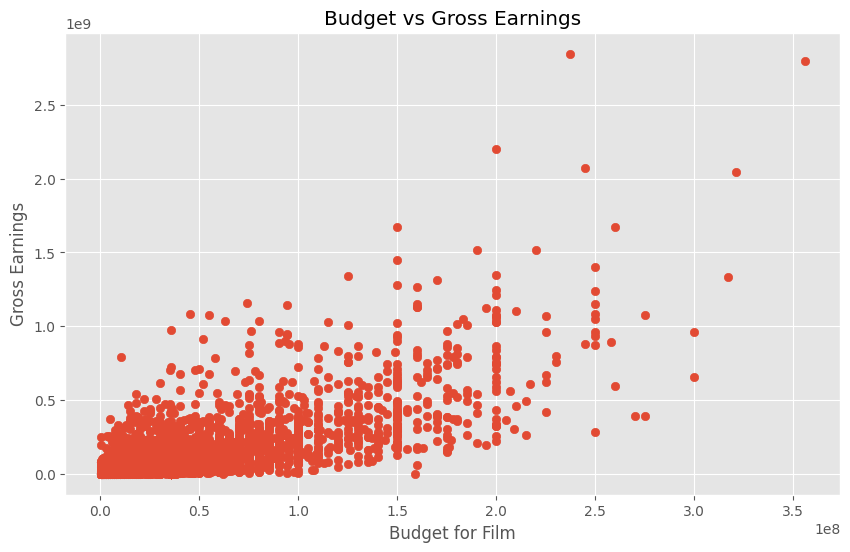

In [ ]:
# Correlation between budget and gross earnings
plt.figure(figsize=(10, 6))
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

**High correlation between budget and gross earnings**

<Axes: xlabel='budget', ylabel='gross'>

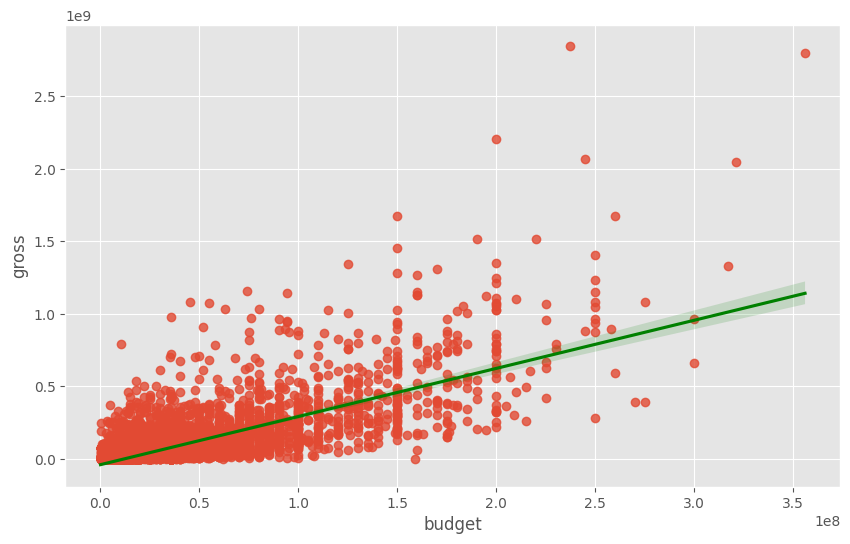

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=df, line_kws={'color': 'green'})

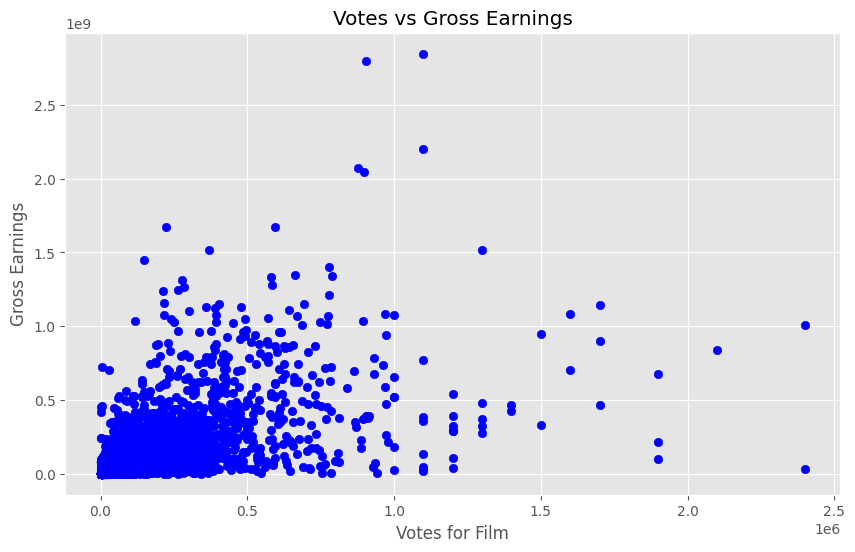

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['votes'], y=df['gross'], color='blue')
plt.title('Votes vs Gross Earnings')
plt.xlabel('Votes for Film')
plt.ylabel('Gross Earnings')
plt.show()

**High correlation between votes and gross earnings**

<Axes: xlabel='votes', ylabel='gross'>

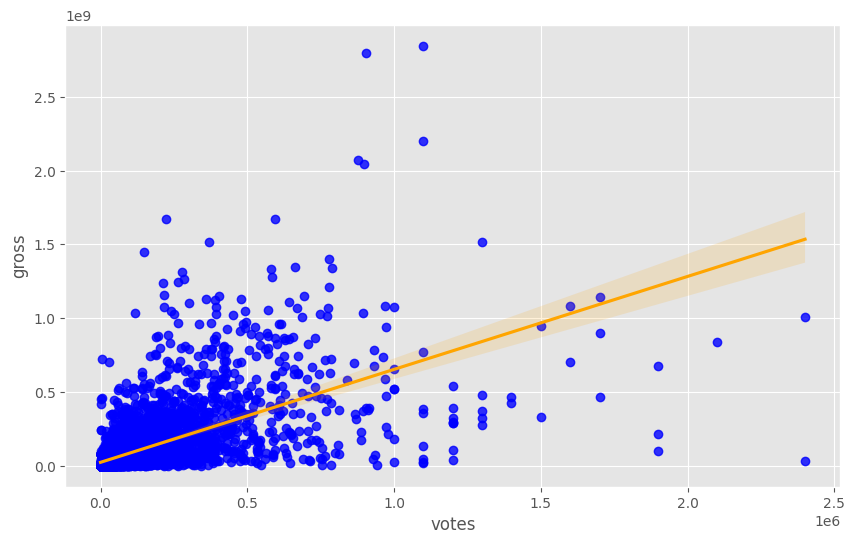

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='votes', y='gross', data=df, color='blue', line_kws={'color': 'orange'})

In [ ]:
# Save the data as a csv file
df.to_csv('movies1.csv', index=False)